# EDA for Peerwise Topic 2

In this colab workbook, I will be conducting some preliminary exploratory data analysis (EDA) on 'C4Questions.xlsx' and 'C4tags.xlsx' files that will form part of our total dataset for Assignment 2.

I begin by, importing the necessary libraries, defining the local path to each of the respective files and reading them in

In [ ]:
#importing wanted libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# reading in the files

path_questions = "/content/drive/My Drive/Colab Notebooks/ASSIGNMENT 2/data/C4Questions.xlsx"

path_tags= "/content/drive/My Drive/Colab Notebooks/ASSIGNMENT 2/data/C4Tags.xlsx"

tags = pd.read_excel(path_tags)
questions =pd.read_excel(path_questions)

## EDA for 'C4Tags'

Here I will use the following for some basic and premliminary data exploration for the 'C4Tags' dataset.

In [ ]:
# first 10 observations
tags.head(n=10)
#type(tags)

,CourseID,QuestionID,Tag,TagID
0,21320,4464532,7,6401890
1,21320,4464532,Brown,6401891
2,21320,4464967,Pink,6402539
3,21320,4464967,3,6402540
4,21320,4468332,Green,6407335
5,21320,4468332,4,6407336
6,21320,4468396,Pink,6407399
7,21320,4468396,10,6407400
8,21320,4468400,Pink,6407404
9,21320,4468400,10,6407405


Just from scanning the first 2 `QuestionID` and `Tag` columns we notice that the same question has 2 tags associated with it. From the information Denyer provides:

- a single quesstion can have several tags associated with it
- up to 5 tags associated with it 

In [ ]:
# looking at the different data types within this dataset
tags.dtypes

CourseID       int64
QuestionID     int64
Tag           object
TagID          int64
dtype: object

Observational Notes:
- Should cast all of these columns to 'object' so that numeric operations cannot be done on them.

In [ ]:
#df.column_name = df.column_name.astype(str)
# casting all into columns to 'str' data types
tags.CourseID= tags.CourseID.astype(str)
tags.QuestionID= tags.QuestionID.astype(str)
tags.TagID= tags.TagID.astype(str)
#transformed data set:
tags.dtypes

CourseID      object
QuestionID    object
Tag           object
TagID         object
dtype: object

### Exploring the different Tags

Now I will explore what exactly are the different tags in the form of a frequency count.

In [ ]:
tags['Tag'].value_counts()

Pink      75
Blue      70
Green     68
Red       65
Black     62
2         60
Yellow    58
1         56
Brown     55
4         54
5         54
3         53
8         52
10        52
9         51
7         48
6         47
White     46
Purple    28
11         3
Name: Tag, dtype: int64

We observe there are 9 tags associated with color and 11 tags associated with numbers from 1-11.

Pink is the most used tag (n= 75) and '11' is the least used (n=3)

In [ ]:
# drafted basic plot

"""import matplotlib.pyplot as plt

fig, ax = plt.subplots()
tags['Tag'].value_counts().plot(ax=ax, kind='bar')
plt.xlabel("Tag Categories")
plt.ylabel("Frequency Count")
plt.title()
plt.title("Bar Chart Example")
plt.legend()
plt.show()
"""

'import matplotlib.pyplot as plt\n\nfig, ax = plt.subplots()\ntags[\'Tag\'].value_counts().plot(ax=ax, kind=\'bar\')\nplt.xlabel("Tag Categories")\nplt.ylabel("Frequency Count")\nplt.title()\nplt.title("Bar Chart Example")\nplt.legend()\nplt.show()\n'

Text(0.5, 1.0, 'Frequency for Tags')

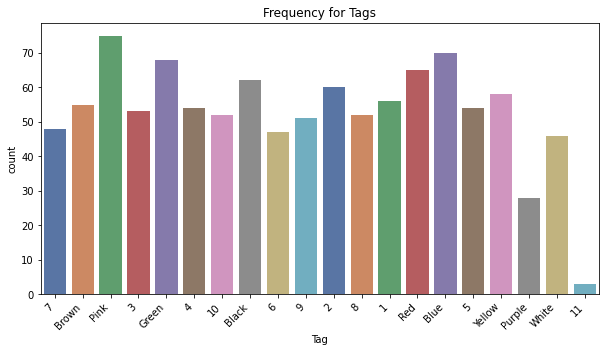

In [ ]:
import seaborn as sns

# useful resource:
#https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
plt.figure(figsize=(10,5))
tag_chart = sns.countplot(x="Tag",data=tags, palette = "deep")
#tag_chart.set_style("white")
#tag_chart.despine()

# takes the x axis labels and rotates them at a 45 angle -otherwise they overlap
tag_chart.set_xticklabels(tag_chart.get_xticklabels(), rotation =45, horizontalalignment='right')
plt.title("Frequency for Tags")

## EDA for C4Questions 

Following similar steps as above we will explore the 'Questions' data set.

We begin by listing all the variable names and their corresponding datatypes:

In [ ]:
questions.dtypes

id                    int64
course_id             int64
timestamp            object
user                  int64
avg_rating          float64
total_responses       int64
total_ratings         int64
top_rating_count      int64
avg_difficulty      float64
total_comments        int64
deleted               int64
answer               object
question             object
numAlts               int64
altA                 object
altB                 object
altC                 object
altD                 object
altE                 object
explanation          object
AcademicMark        float64
dtype: object

There are 21 variables.
- alta,b,c,d are the number of alterations that a person made to their question.

Next we will explore the first 10 observations:

In [ ]:
# N=10 first observations

questions.head()

,id,course_id,timestamp,user,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,question,numAlts,altA,altB,altC,altD,altE,explanation,AcademicMark
0,4464532,21320,2020-04-27 18:51:25,635990,3.78,10,9,2,1.2222,8,2,D,Operons are a series of related genes that are...,4,A,B,C,D,NaN,<p>Because the bacteria only wants to make th...,NaN
1,4464967,21320,2020-04-27 22:56:37,636029,3.25,7,4,1,0.7500,5,2,D,The sigma (&sigma;) subunit is required for th...,5,The &sigma; subunit decreases the general;affi...,The &sigma; subunit recognizes the promoter se...,The &sigma; subunit can be reused again and ag...,The &sigma; subunit clings onto the core polym...,Binding of the sigma subunit is an important s...,<p>The sigma subunit can direct the tight bin...,NaN
2,4468332,21320,2020-04-29 18:19:30,636019,2.80,13,10,0,0.5000,10,0,C,Which of the following answers provides <stron...,4,RNA polymerase has no;proofreading ability to ...,RNA;polymerase has insufficient bases for pair...,RNA polymerase has to trigger mutations that a...,RNA;polymerase has longer strand for transcrip...,NaN,<p>Wrong - Answer A:&nbsp;RNA polymerase has ...,3.0
3,4468396,21320,2020-04-29 19:15:16,635992,0.00,0,0,0,0.0000,0,2,B,Rifampicin is an example of an antibiotic that...,5,Initiation; RNA polymerase cannot bind to prom...,Elongation; inability to process RNA synthesis...,Termination; No stop signal can be recognized ...,Elongation; inability to unwind DNA then cause...,None of the above is the correct answer.,<p>The correct answer is B.&nbsp;</p><p>&nbsp...,NaN
4,4468400,21320,2020-04-29 19:15:16,635992,2.86,11,7,0,1.0000,8,2,B,Rifampicin is an example of an antibiotic that...,5,Initiation; RNA polymerase cannot bind to prom...,Elongation; inability to process RNA synthesis...,Termination; No stop signal can be recognized ...,Elongation; inability to unwind DNA then cause...,None of the above is the correct answer.,<p>The correct answer is B.&nbsp;</p><p>&nbsp...,NaN


### Key observations:
From this snapshot of the data we can notice a number of things:
- There is complext text data being stored ( **thick data**) in the last 7 columns
  - These data values will have to be treated accordingly with techniques such as inverse weighting.
  - we also see some html formatting embedded in the recorded text value. Such as "< p >" paragraph tags.
    - In the cleaning process our group will have to make decision to take them out.

- The final grade has a combination of `NaN` and numeric values. 


### Charts 

Here we will explore some basic trends using the numeric variables in this data set.

More insights into the data can be gleaned for different combinations- I have chosen those aspects which are of interest to me.

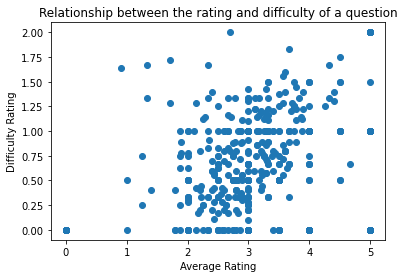

In [ ]:
#  relationship with average rating of a question and its difficulty

import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(questions['avg_rating'], questions['avg_difficulty'])
plt.title('Relationship between the rating and difficulty of a question')
plt.xlabel('Average Rating')
plt.ylabel('Difficulty Rating')

plt.show()

### Key Take aways:

- There is a cluster of data points at the centre of the graph

- we can observe 1 outlier with an average rating of 0 and a difficulty rating of 0

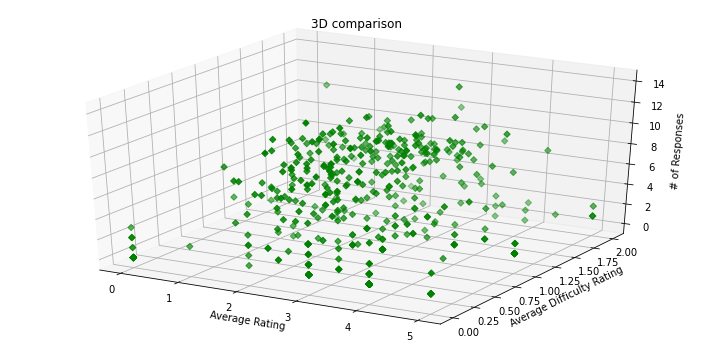

In [ ]:
#  relationship with average rating of a question, 
#its difficulty and the total responses on a given question
#3d plot 

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection = '3d')

# 3 axes
ax.scatter(questions['avg_rating'],questions['avg_difficulty'],questions['total_responses'], c = 'g', marker = 'D')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Average Difficulty Rating')
ax.set_zlabel('# of Responses')
plt.title('3D comparison')
plt.tight_layout()
plt.show()

### Key take aways

- This is not a very informative graph as the points are quite clusterd together and overlap eachother 

- Some anomalies:
  - where a question is given a rating of 5 but a difficulty score of ~0.25 and looks like it hasnt been answered once
  - this graph may highlight a human's inaccurate eye in interpreting 3 dimensional space and representation of information in this way.

- but we do see that majority of the questions are centered at an average rating of 2-3, a difficulty rating of 0.75-1.75 and # of responses 4-10